In [1]:
%pip install qiskit qiskit-ibm-runtime qiskit_aer 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.


In [1]:
import qiskit
qiskit.__version__

'2.1.2'

# GROVER 🔍 

Grover’s Algorithm is one of the most disruptive quantum algorithms and one of the reasons why quantum computing attracts a lot of interest.

[Medium Article](https://towardsdatascience.com/behind-oracles-grovers-algorithm-amplitude-amplification-46b928b46f1e
)

![display image](https://media3.giphy.com/media/xGdvlOVSWaDvi/giphy.gif?cid=ecf05e47yms5gzy5z76203eastauclj5s5wknuaq1x76enkc&rid=giphy.gif&ct=g)

## What is the strength of Grover’s Algorithm?
Let us say we need to find a specific target element in an unstructured set of N elements.

In classical computing, since we have no prior knowledge about where this target element is located, we would need to look at every single element.



For example, suppose looking for the number 3 in an unsorted array
![display image](./images/searching.gif)

### The cost is O(N) (i.e., in the worst case, we need to scan all the N elements).

### In quantum computing, thanks to Grover’s Algorithm, it is possible to retrieve the solution in O(√N). We achieved a quadratic speedup with respect to classical computing 
![Quadratic](./images/quadratic.jpeg)

## A little background

Typically, quantum computers have to run a given quantum algorithm more than just a single time. Sometimes they return the correct output, and sometimes they do not.

Thus, our objective is to increase (or “amplify”) the chances of getting the correct output.

![Amplify_solution](./images/amplify_histogram.jpeg)
***

# <center> GROVER’S BUILDING BLOCKS </center>
Grover’s Algorithm is made of two parts: an Oracle and a Diffuser.

## - ORACLE
The Oracle “marks” the solution(s)

Thanks to the oracle, we are able to mark the correct element among all the N elements of an unstructured set of data.

![oracle](./images/oracle.jpeg)

# However, the oracle alone is not enough.


In fact, the oracle just marks the correct element, but it does not increase the probability of getting this element as the output of the quantum algorithm. Indeed, the oracle alone would be useless since the probability of getting this element would be 1/N (i.e., at random!).

![mark](./images/correct_sol.jpeg)

Here the Diffuser comes to the rescue! In fact, it is able to increase the chances of getting the triangle rectangle!

## - THE DIFFUSER

The Diffuser “amplifies” the solution(s).

It increases the chances of getting the element marked by the oracle as output

![amplify](./images/amplify_hist.jpeg)

***

# <center>   “What does an oracle look like”? </center>
![display image](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExNjNhYjU0OWVlNjI5ODk5ZTZjMDE5MGFmNTBkY2NkZGI3MWUyZWJmMSZjdD1n/zvF28LMGf6OxsUlIIP/giphy.gif)

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import MCXGate, HGate, XGate, ZGate
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator

import math

In [3]:
def oracle(bin_value):
    o = QuantumRegister(len(bin_value), 'o')
    m = QuantumRegister(1, 'm')
    
    oracle = QuantumCircuit(o, m, name='oracle')
    MCZGate = ZGate().control(num_ctrl_qubits=len(o), label=bin_value, ctrl_state=bin_value)
    oracle.append(MCZGate, o[0:]+[m])
    
    return oracle

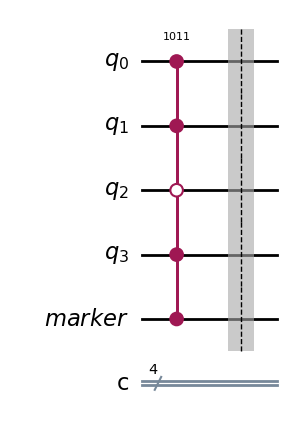

In [4]:
bin_value = '1011' #val: 11

q = QuantumRegister(len(bin_value), 'q')
marker = QuantumRegister(1, 'marker')

c_bit = ClassicalRegister(len(bin_value), 'c')

qc = QuantumCircuit(q, marker, c_bit)


qc.append(oracle(bin_value), q[0:]+[marker])


qc.barrier()
qc.decompose().draw('mpl')

In [5]:
def diffuser(len_element):
    d = QuantumRegister(len_element, 'd')
    m = QuantumRegister(1, 'm')
    
    diffuser = QuantumCircuit(d, m, name='diffuser')
    
    for i in range(len(d)):
        diffuser.append(HGate(), [d[i]])
        diffuser.append(XGate(), [d[i]])
    
    MCZGate = ZGate().control(len(d))
    diffuser.append(MCZGate, d[0:]+[m])

    for i in range(len(d)):
        diffuser.append(XGate(), [d[i]])
        diffuser.append(HGate(), [d[i]])

    
    return diffuser

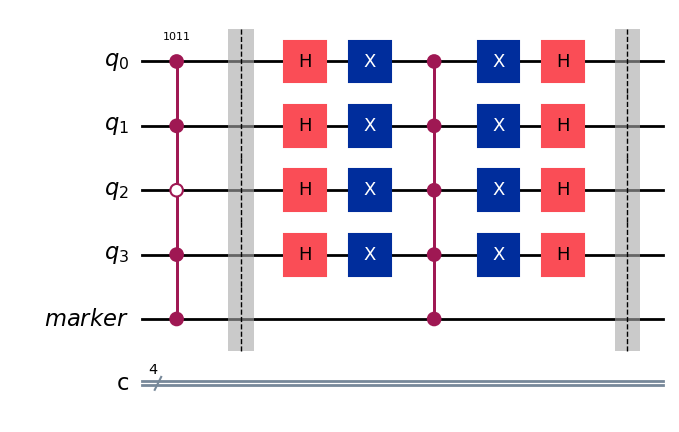

In [6]:
qc.append(diffuser(len(bin_value)), q[0:]+[marker])

qc.barrier()
qc.decompose().draw('mpl')

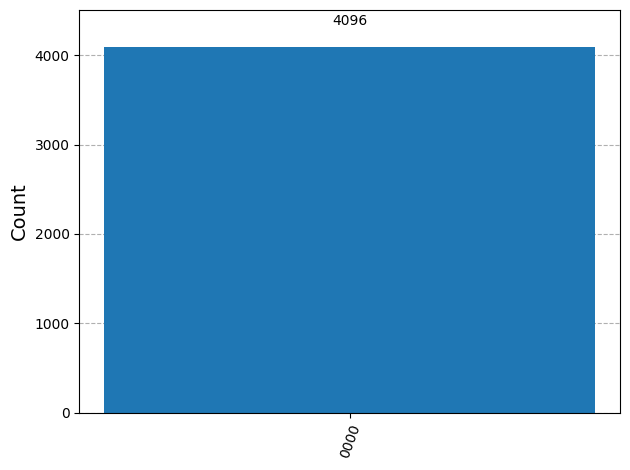

In [7]:
qc.measure(q, c_bit)

simulator = AerSimulator()  # Create a simulator backend
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

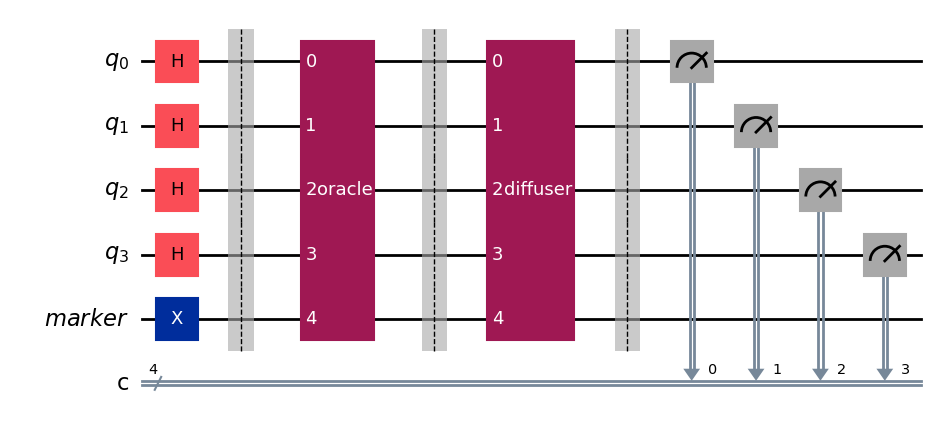

In [8]:
bin_value = '1011'


q = QuantumRegister(len(bin_value), 'q')
marker = QuantumRegister(1, 'marker')

c_bit = ClassicalRegister(len(bin_value), 'c')

qc = QuantumCircuit(q, marker, c_bit)

qc.append(XGate(), [marker]) # <---- Enable destructive interference


for i in range(len(q)):
    qc.append(HGate(), [q[i]])

qc.barrier()

qc.append(oracle(bin_value), q[0:]+[marker])

qc.barrier()

qc.append(diffuser(len(bin_value)), q[0:]+[marker])

qc.barrier()
qc.measure(q, c_bit)

qc.draw('mpl')

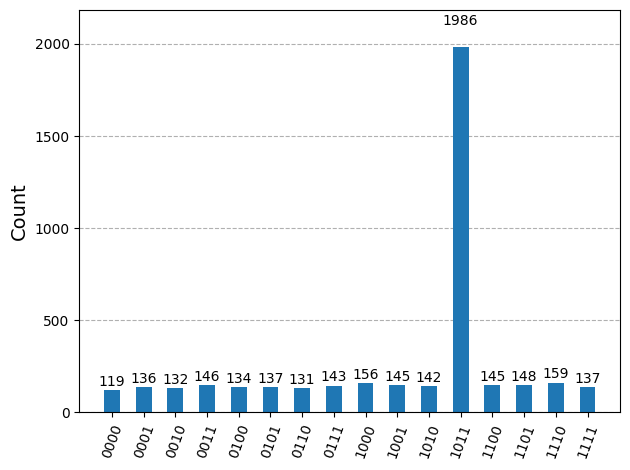

In [9]:
simulator = AerSimulator()  # Create a simulator backend
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

# Repetitions 
$\frac{\pi}{4} \sqrt{2^n}$, where $n$ is the number of variables

# What does it happen when we perform more rotations?

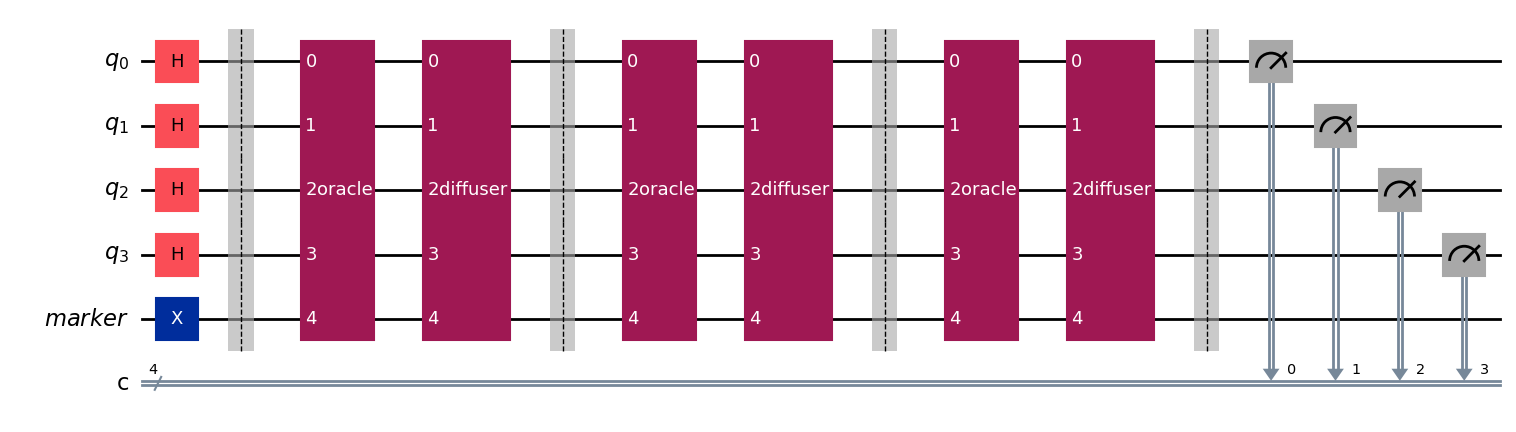

In [10]:
bin_value = '1011' #'101010'


q = QuantumRegister(len(bin_value), 'q')
marker = QuantumRegister(1, 'marker')

c_bit = ClassicalRegister(len(bin_value), 'c')

qc = QuantumCircuit(q, marker, c_bit)

qc.append(XGate(), [marker])

for i in range(len(q)):
    qc.append(HGate(), [q[i]])

qc.barrier()

repetitions = math.floor(math.pi/4 * math.sqrt(2**len(q)))

for i in range(repetitions):
    qc.append(oracle(bin_value), q[0:]+[marker])
    qc.append(diffuser(len(bin_value)), q[0:]+[marker])
    qc.barrier()

qc.measure(q, c_bit)

qc.draw('mpl')

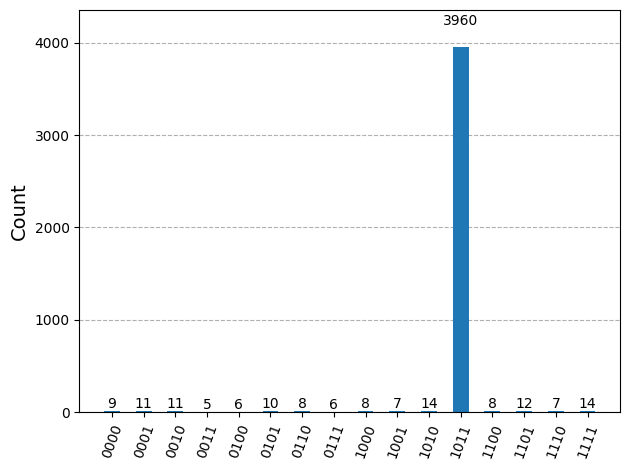

In [11]:
simulator = AerSimulator()  # Create a simulator backend
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

# Behind the Oracle
I found the name “oracle” a little misleading. It seems that there is someone that can give you the solution by just asking: “What is the solution?”.

I prefer to picture in my mind the image of a filter! It is up to you to handcraft a filter that has the exact shape of the element you look for!

![filter](./images/filter.jpeg)

## <center>  Why a filter? </center> 

Well, before running Grover’s Algorithm, in some sense, you possess all the elements, and you want to filter out the ones that are not your solution.

Still, keep in mind that you, and only you, carefully define this filter.

Now, a question may arise:

    I have to design a filter that is able to catch the solution and reject all the other elements. But to be able to catch the solution, I need to know the solution, right?

    Thus, this means that I already know the solution. So…

    What’s the point of this algorithm?

That is a legitimate concern!

# One Step back
![display image](https://media1.giphy.com/media/tsFbZkOME0IMwxzkAT/giphy.gif?cid=ecf05e47fv4d8oeh4jmezmmgy54ceq0adk52olne00j0kirr&rid=giphy.gif&ct=g)

Grover’s Algorithm’s original name is “A fast quantum mechanical algorithm for database search.” Thus, the examples I found were on looking for a number in a set of numbers.

If you want to find number 3 in a dataset, you already know the solution a priori. You were defining an oracle that caught for number 3, and the output was 3. Nothing too exciting in the first instance, right?

# Two Step ahead

The turning point is that the oracle can be a function, not just a number!

    What do you intend for “an oracle can be a function”?

The mental step is small, but the point is that we don’t need to know the solution, which will be your oracle! Hence, obtaining a quadratic speed up with respect to the classical brute force algorithm!
***

# Solving SAT with a quadratic speedup

A SAT problem consists in finding an assignment of variables such that it satisfies a given Boolean formula. 

For example, in $(¬ x_0 ∧ x_1)$, the assignment that satisfies the boolean formula is:

$x_0=False, x_1=True$

In particular, we focus on a particular form of Boolean formula, the Conjunctive Normal Form (CNF) or Clausal Normal Form.

CNF Refresh

The CNF consists of conjunctions of one or more clauses.

- Each clause contains one or more literals (boolean variables).
- A CNF contains only the operators: ¬(not), ∨ (or), ∧ (and).
- The conjunctions of clauses are obtained by means of the ∧ operator.
- The literals of each clause are related by the ∨ operator
- The ¬ operator can only be used as part of a literal.

# Oracle SAT solver with 1 solution


#### Satisfy to following 3-SAT
$(x_0 ∨ x_1) ∧ ¬x_1$

### In QC, we know how to implement the AND operator -> (Multi-Controlled X gate)

##### De Morgan
¬(a ∧ b) = ¬a ∨ ¬b \
¬(a ∨ b) = ¬a ∧ ¬b

#### Let us rewrite (1)
$(x_0 ∨ x_1) ∧ ¬x_1 = $

$¬(¬x_0 ∧ ¬x_1) ∧ ¬x_1$


and let us define $w_0$ and $w_1$ as:

$w_0 = ¬x_0 ∧ ¬x_1$ 

$w_1 = ¬x_1$ 

$w_2 = ¬w_0 ∧ w_1$ 

Now the SAT instance is expressed in terms of only AND -> happy :)

Spoiler: the solution is 01 (order: $x_1x_0$)

Since we already know that exists a single solution, then the number of repetitions of (oracle-diffuser) is given by the formula: 

$\frac{\pi}{4} \sqrt{2^n}$, where $n$ is the number of variables, respectively $x_0, x_1$

In [12]:
def diffuser(len_element):
    d = QuantumRegister(len_element, 'd')
    m = QuantumRegister(1, 'm')
    
    diffuser = QuantumCircuit(d, m, name='diffuser')
    
    for i in range(len(d)):
        diffuser.append(HGate(), [d[i]])
        diffuser.append(XGate(), [d[i]])
    
    #diffuser.append(HGate(), [m])
    MCZGate = ZGate().control(len(d))
    diffuser.append(MCZGate, d[0:]+[m])
    #diffuser.append(HGate(), [m])

    for i in range(len(d)):
        diffuser.append(XGate(), [d[i]])
        diffuser.append(HGate(), [d[i]])

    return diffuser

In [13]:
def oracle(n_var, steps):
    x = QuantumRegister(n_var, 'x')
    w = QuantumRegister(len(steps)-1, 'w')
    m = QuantumRegister(1, 'm')
    
    oracle = QuantumCircuit(x, w, m, name='oracle')
    
    #step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    #step: w1 = ¬x_1
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[1]]+[w[1]])
    oracle.barrier()

    #step: w2 = ¬(¬x_0 ∧ ¬x_1) ∧ ¬x_1
    MCZGate = ZGate().control(num_ctrl_qubits=len(steps[2]), label=steps[2], ctrl_state=steps[2])
    oracle.append(MCZGate, w[0:]+[m[0]])  
    #oracle.append(MCXGate(len(steps[2]), label=steps[2], ctrl_state=steps[2]), w[0:]+[m[0]])    
    oracle.barrier()
   
    
    #uncomputation step: w1 = ¬x_1
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[1]]+[w[1]])
    oracle.barrier()

    #uncomputation step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    return oracle

# Quantum Circuit for the SAT instance

$¬(¬x_0 ∧ ¬x_1) ∧ ¬x_1$


and let us define $w_0$ and $w_1$ as:

- $w_0 = ¬x_0 ∧ ¬x_1$ 

- $w_1 = ¬x_1$ 

And eventually:
- $¬w_0 ∧ w_1$

In [14]:
n = 2 #number of variables
steps = ['00', '0', '10']

x = QuantumRegister(n, 'x')

w = QuantumRegister(len(steps)-1, 'w') #working qubits: for each clauses, 1 working qubit storing the result
marker = QuantumRegister(1, 'marker')

c_res = ClassicalRegister(len(x), 'res')

sat_solver = QuantumCircuit(x, w, marker, c_res)
sat_solver.append(XGate(), [marker])
#sat_solver.append(HGate(), [marker])
sat_solver.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "x"), index=0>, <Qubit register=(2, "x"), index=1>, <Qubit register=(2, "w"), index=0>, <Qubit register=(2, "w"), index=1>, <Qubit register=(1, "marker"), index=0>), clbits=())

## Step 1: Generate all the possible assignments for the boolean formula 

In [15]:
for i in range(len(x)):
    sat_solver.append(HGate(), [x[i]])
    
sat_solver.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "x"), index=0>, <Qubit register=(2, "x"), index=1>, <Qubit register=(2, "w"), index=0>, <Qubit register=(2, "w"), index=1>, <Qubit register=(1, "marker"), index=0>), clbits=())

### Oracle Circuit

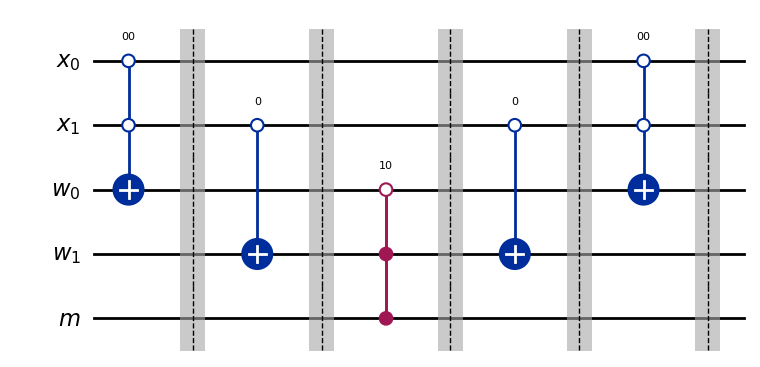

In [16]:
oracle(len(x), steps).draw(output='mpl')

## Step 2 - 3: Apply Oracle and Diffuser

In [17]:
repetitions = math.floor(math.pi/4 * math.sqrt(2**n))
print(repetitions)

for i in range(repetitions):
    sat_solver.append(oracle(len(x), steps), x[0:]+w[0:]+[marker])
    sat_solver.append(diffuser(len(x)), x[0:]+[marker])
    sat_solver.barrier()
    
sat_solver.measure(x, c_res)

1


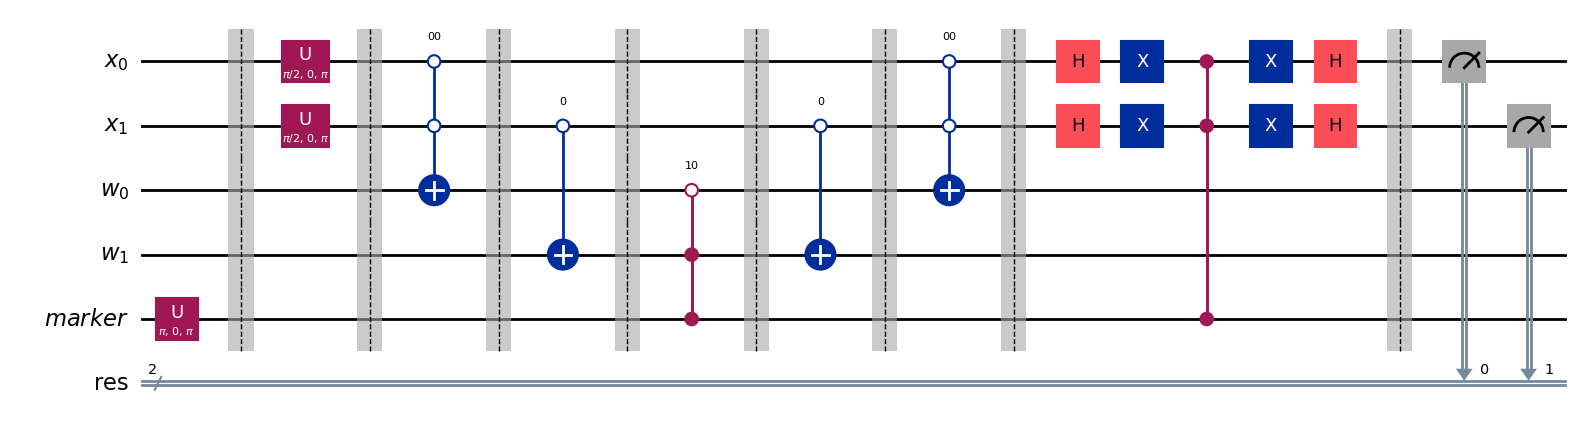

In [18]:
sat_solver.decompose().draw(output='mpl')

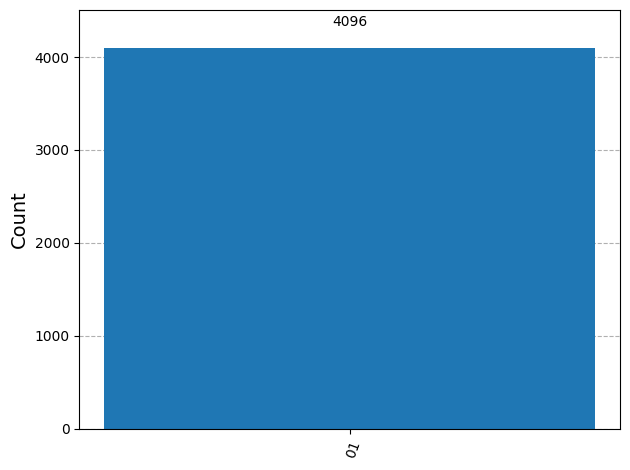

In [19]:
simulator = AerSimulator()  # Create a simulator backend
transpiled_sat_solver = transpile(sat_solver, simulator)
result = simulator.run(transpiled_sat_solver, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

## The solution is:
- 01 \
(order: $x_1x_0$)

***

# Oracle SAT solver for MORE THAN ONE solution


#### Satisfy to following 3-SAT
$(x_0 ∨ x_1) ∧ ¬x_1 ∧ (x_2 ∨ ¬x_2)$

### In QC, we know how to implement the AND operator -> (Multi-Controlled X gate)

##### Recalling De Morgan
¬(a ∧ b) = ¬a ∨ ¬b \
¬(a ∨ b) = ¬a ∧ ¬b

#### Let us rewrite (1)
$(x_0 ∨ x_1) ∧ ¬x_1 ∧ (x_2 ∨ ¬x_2)$ = \
$¬(¬x_0  ∧ ¬x_1) ∧ ¬x_1$ 

1) Note that $(x_2 ∨ ¬x_2)$ is always true.

2) Now the SAT instance is expressed in terms of only AND -> happy :)

IMPORTANT: Since $(x_2 ∨ ¬x_2)$ is always true, we will find two solutions. In one solution $x_2$ is 0 and in the other $x_2$ is 1. 


In fact, (spoiler) the solutions are: 001, 101 (order: $x_2x_1x_0$). 

Since the solutions are 2, then the number of repetitions of (oracle-diffuser) is given by the formula: 

$\frac{\pi}{4} \sqrt{\frac{2^n}{\#solutions}}$ where $n$ is the number of variables. -> In our example we have 3 variables: $x_0, x_1, x_2$
***

$¬(¬x_0 ∧ ¬x_1) ∧ ¬x_1$


and let us define $w_0$ and $w_1$ as:

- $w_0 = ¬x_0 ∧ ¬x_1$ 

- $w_1 = ¬x_1$ 

And eventually:
- $¬w_0 ∧ w_1$

In [20]:
def oracle(n_var, steps):
    x = QuantumRegister(n_var, 'x')
    w = QuantumRegister(len(steps)-1, 'w')
    m = QuantumRegister(1, 'm')
    
    oracle = QuantumCircuit(x, w, m, name='oracle')
    
    #step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    #step: w1 = ¬x_1
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[1]]+[w[1]])
    oracle.barrier()

    #step: w2 = ¬(¬x_0 ∧ ¬x_1) ∧ ¬x_1
    MCZGate = ZGate().control(num_ctrl_qubits=len(steps[2]), label=steps[2], ctrl_state=steps[2])
    oracle.append(MCZGate, w[0:]+[m[0]])    
    oracle.barrier()
   
    
    #uncomputation step: w1 = ¬x_1
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[1]]+[w[1]])
    oracle.barrier()

    #uncomputation step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    return oracle

In [21]:
n = 3 #number of variables
n_solutions = 2 #known a priori

steps = ['00', '0', '10']

x = QuantumRegister(n, 'x')

w = QuantumRegister(len(steps)-1, 'w') #working qubits: for each clauses, 1 working qubit storing the result
marker = QuantumRegister(1, 'marker')

c_res = ClassicalRegister(len(x), 'res')

sat_solver = QuantumCircuit(x, w, marker, c_res)
sat_solver.append(XGate(), [marker])

for i in range(len(x)):
    sat_solver.append(HGate(), [x[i]])
    
sat_solver.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=6, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "x"), index=0>, <Qubit register=(3, "x"), index=1>, <Qubit register=(3, "x"), index=2>, <Qubit register=(2, "w"), index=0>, <Qubit register=(2, "w"), index=1>, <Qubit register=(1, "marker"), index=0>), clbits=())

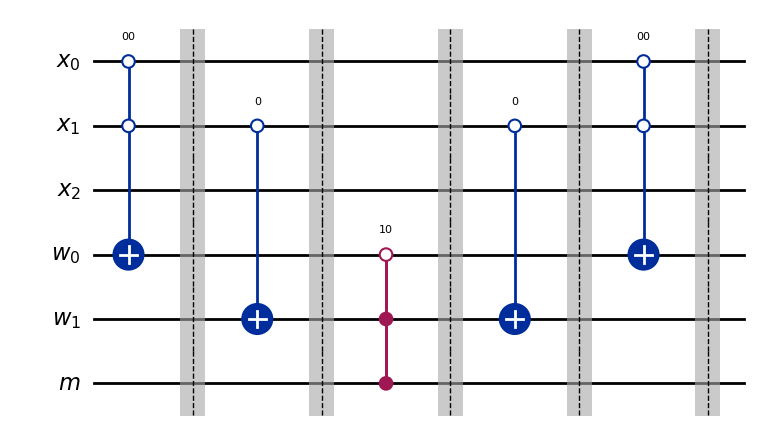

In [22]:
oracle(len(x), steps).draw(output='mpl')

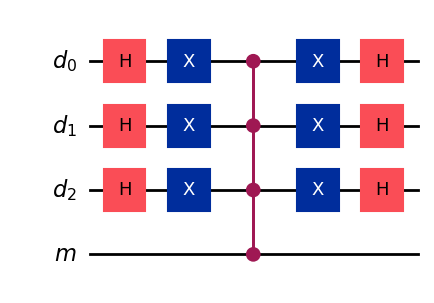

In [23]:
diffuser(len(x)).draw(output='mpl')

In [24]:
repetitions = math.floor(math.pi/4 * math.sqrt(2**len(x)/n_solutions)) #<-----
print(repetitions)

for i in range(repetitions):
    sat_solver.append(oracle(len(x), steps), x[0:]+w[0:]+[marker])
    sat_solver.append(diffuser(len(x)), x[0:]+[marker])
    sat_solver.barrier()
    
sat_solver.measure(x, c_res)

1


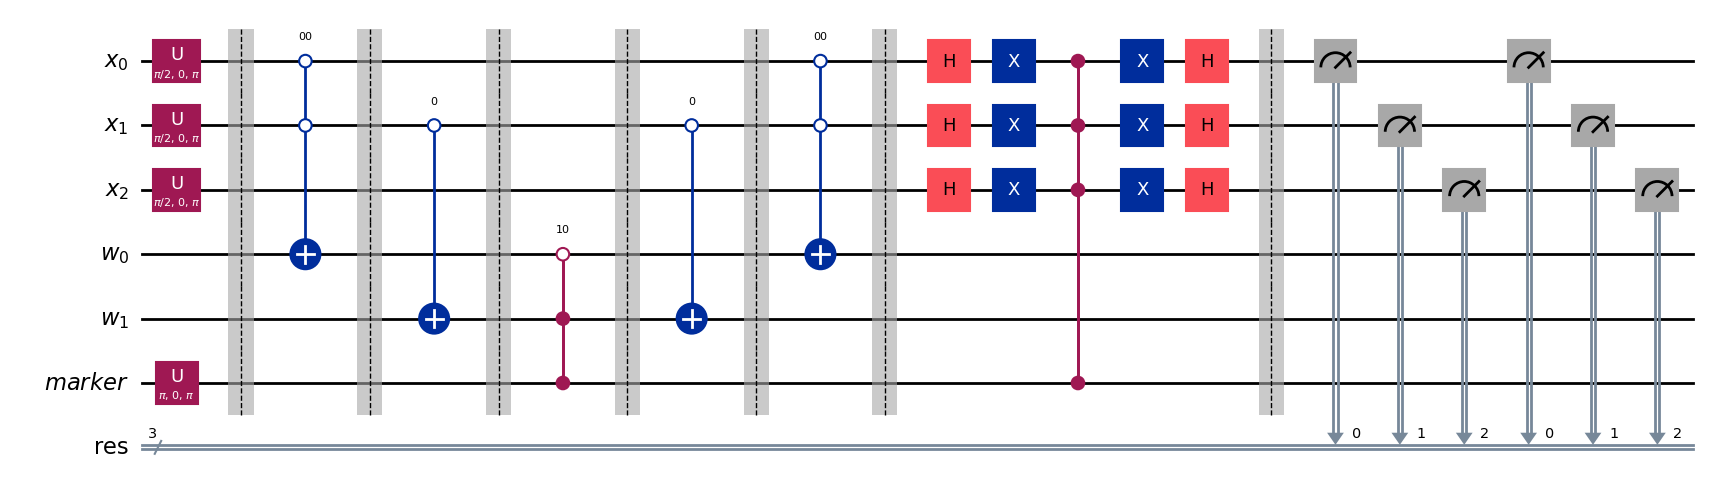

In [25]:
sat_solver.measure(x, c_res)

sat_solver.decompose().draw('mpl')

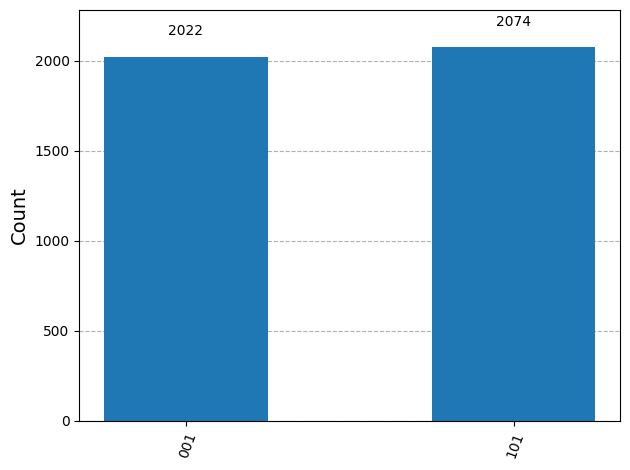

In [26]:
simulator = AerSimulator()  # Create a simulator backend
transpiled_sat_solver = transpile(sat_solver, simulator)
result = simulator.run(transpiled_sat_solver, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

## The solutions are: 
- 001
- 101 \
(order: $x_2 x_1 x_0$)

# Exercise


#### Satisfy to following 3-SAT
$(x_0 ∨ x_1) ∧ (¬x_0 ∨ x_2)  ∧ (x_1 ∨ ¬x_2)$

#### How many solutions? 


***

In [27]:
def oracle(n_var, steps):
    x = QuantumRegister(n_var, 'x')
    w = QuantumRegister(len(steps)-1, 'w')
    m = QuantumRegister(1, 'm')
    
    oracle = QuantumCircuit(x, w, m, name='oracle')
    
    #step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    #step: w1 = (x_0 ∧ ¬x_2)
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[0]]+[x[2]]+[w[1]])
    oracle.barrier()

    #step: w2 = (¬x_1 ∧ x_2)
    oracle.append(MCXGate(len(steps[2]), label=steps[2], ctrl_state=steps[2]), [x[1]]+[x[2]]+[w[2]])
    oracle.barrier()

    #step: w3 = ¬(¬x_0 ∧ ¬x_1) ∧ ¬(x_0 ∧ ¬x_2) ∧ ¬(¬x_1 ∧ x_2)
    MCZGate = ZGate().control(num_ctrl_qubits=len(steps[3]), label=steps[3], ctrl_state=steps[3])
    oracle.append(MCZGate, w[0:]+[m[0]])    
    oracle.barrier()
   
    
    #uncomputation step: w2 = (¬x_1 ∧ x_2)
    oracle.append(MCXGate(len(steps[2]), label=steps[2], ctrl_state=steps[2]), [x[1]]+[x[2]]+[w[2]])
    oracle.barrier()

    #uncomputation step: w1 = (x_0 ∧ ¬x_2)
    oracle.append(MCXGate(len(steps[1]), label=steps[1], ctrl_state=steps[1]), [x[0]]+[x[2]]+[w[1]])
    oracle.barrier()

    #uncomputation step: w0 = (¬x_0 ∧ ¬x_1)
    oracle.append(MCXGate(len(steps[0]), label=steps[0], ctrl_state=steps[0]), [x[0]]+[x[1]]+[w[0]])
    oracle.barrier()

    return oracle

In [28]:
n = 3 #number of variables
n_solutions = 3 #known a priori

steps = ['00', '01', '10', '000']

x = QuantumRegister(n, 'x')

w = QuantumRegister(len(steps)-1, 'w') #working qubits: for each clauses, 1 working qubit storing the result
marker = QuantumRegister(1, 'marker')

c_res = ClassicalRegister(len(x), 'res')

sat_solver = QuantumCircuit(x, w, marker, c_res)
sat_solver.append(XGate(), [marker])

for i in range(len(x)):
    sat_solver.append(HGate(), [x[i]])
    
sat_solver.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "x"), index=0>, <Qubit register=(3, "x"), index=1>, <Qubit register=(3, "x"), index=2>, <Qubit register=(3, "w"), index=0>, <Qubit register=(3, "w"), index=1>, <Qubit register=(3, "w"), index=2>, <Qubit register=(1, "marker"), index=0>), clbits=())

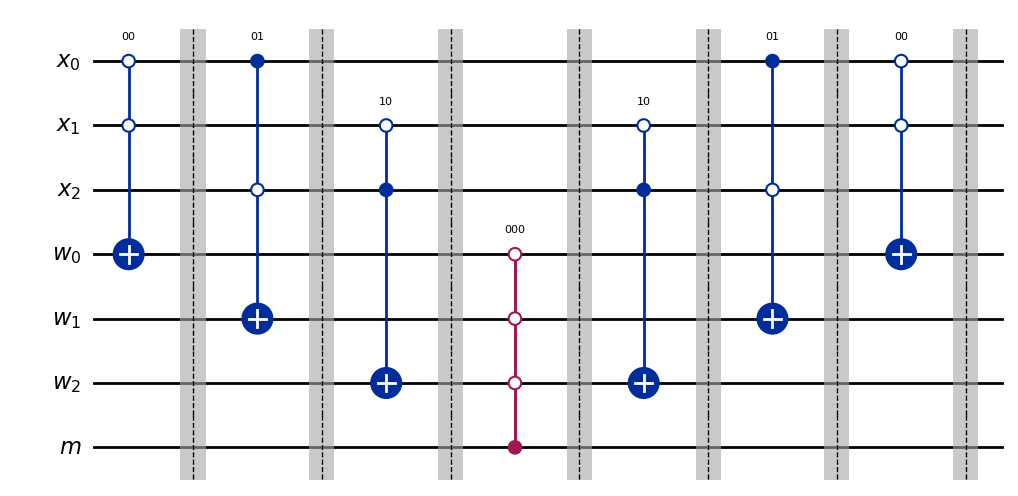

In [29]:
oracle(len(x), steps).draw(output='mpl')

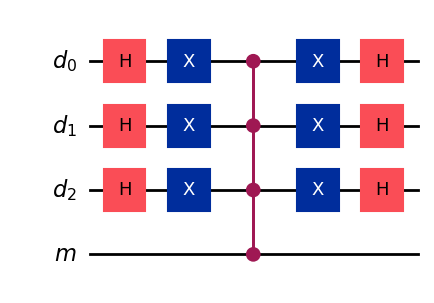

In [30]:
diffuser(len(x)).draw(output='mpl')

In [31]:
repetitions = math.floor(math.pi/4 * math.sqrt(2**len(x)/n_solutions)) #<-----
print(repetitions)

for i in range(repetitions):
    sat_solver.append(oracle(len(x), steps), x[0:]+w[0:]+[marker])
    sat_solver.append(diffuser(len(x)), x[0:]+[marker])
    sat_solver.barrier()
    
sat_solver.measure(x, c_res)

1


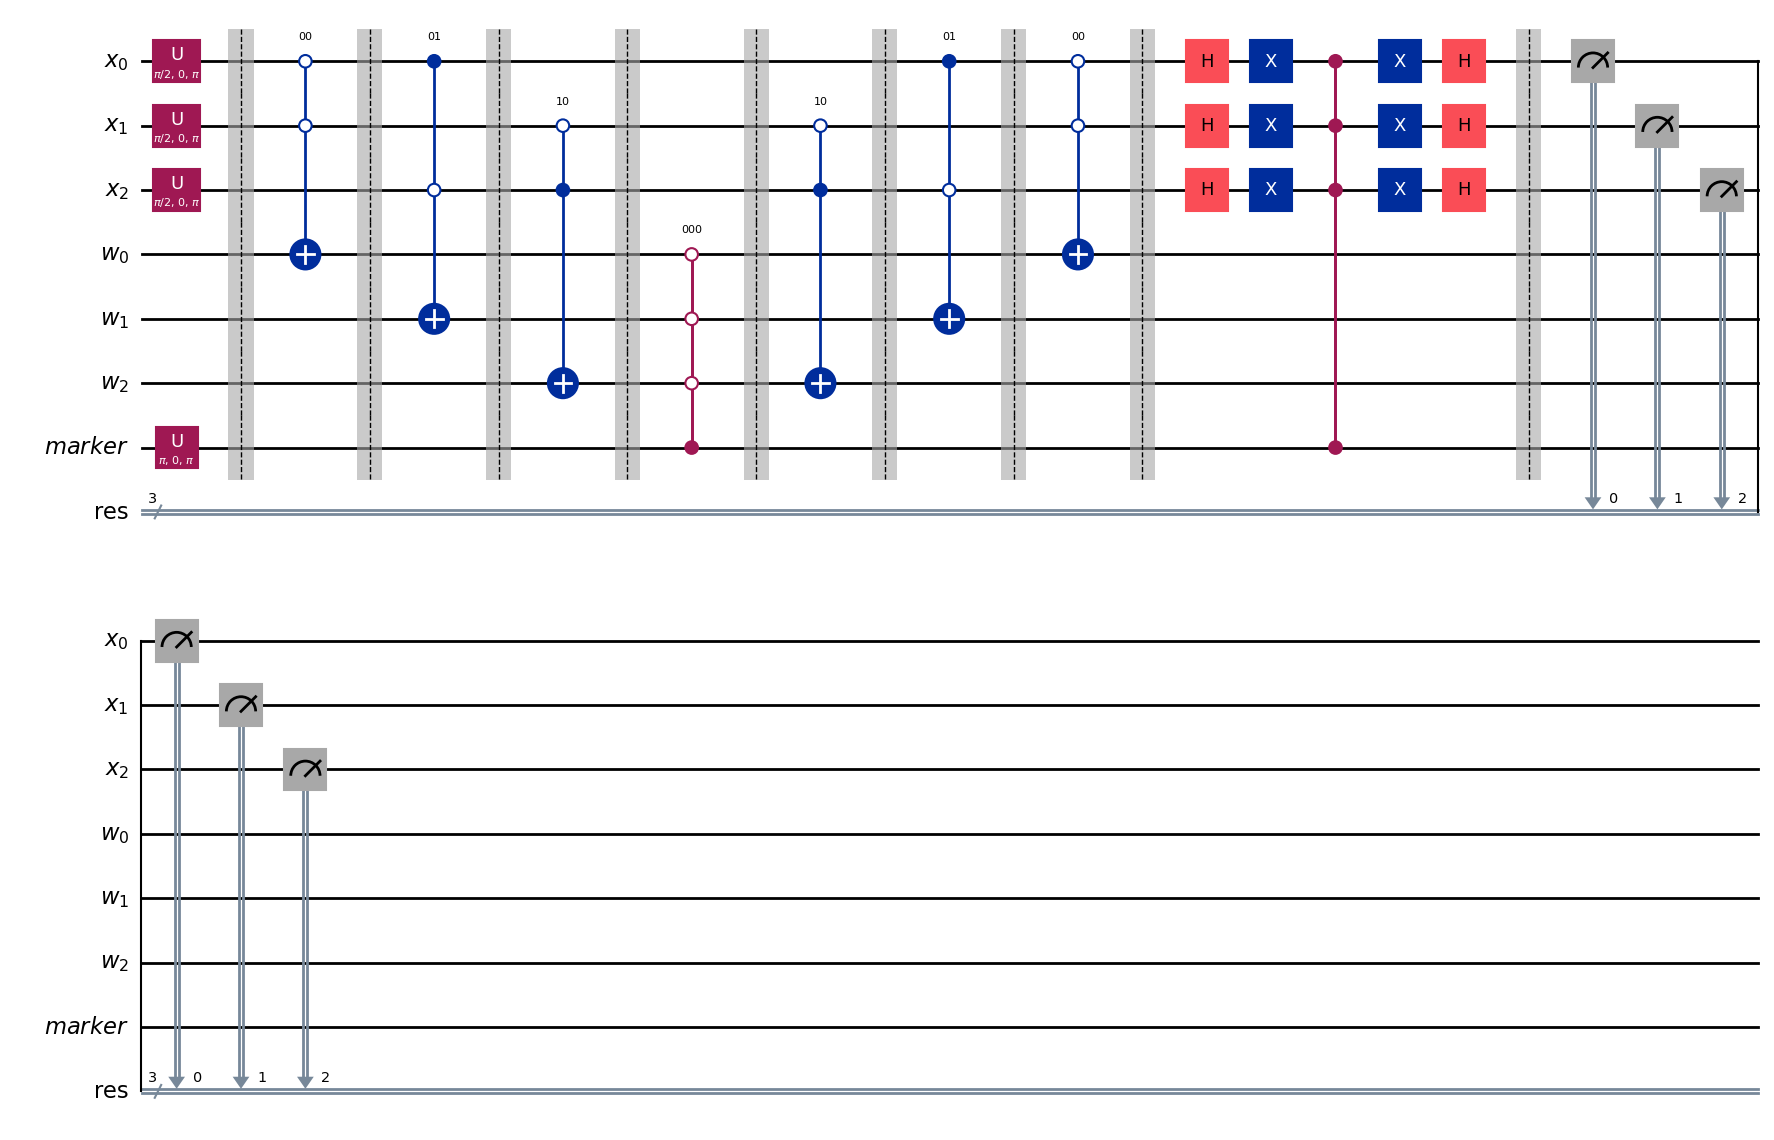

In [32]:
sat_solver.measure(x, c_res)

sat_solver.decompose().draw('mpl')

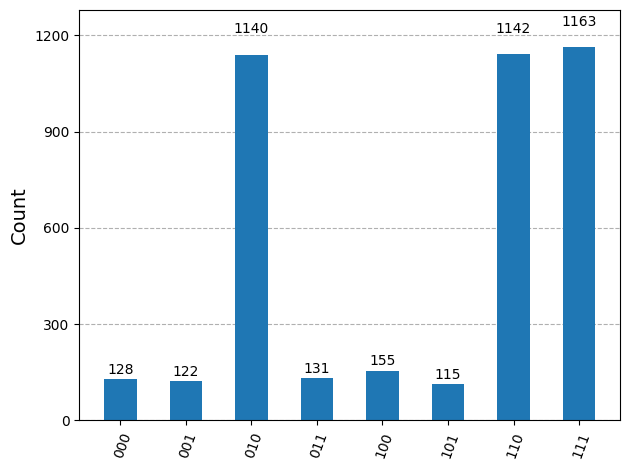

In [33]:
simulator = AerSimulator()  # Create a simulator backend
transpiled_sat_solver = transpile(sat_solver, simulator)
result = simulator.run(transpiled_sat_solver, shots=4096).result()  # Run the circuit and get the result
counts = result.get_counts()
plot_histogram(counts)

## The solutions are: 
- 010
- 110 
- 111 
(order: $x_2 x_1 x_0$)